In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

%config InlineBackend.figure_formats = ['pdf', 'svg']
%matplotlib inline

In [12]:
df0 = pd.read_csv('runc_square.csv')
df1 = pd.read_csv('random_square.csv')

df = pd.concat((df0, df1))
df['Method'] = ['RUNC-M'] * len(df0) + ['Random'] * len(df1)

Text(0.5, 1.0, 'Computation time, $n\\_rows=30$')

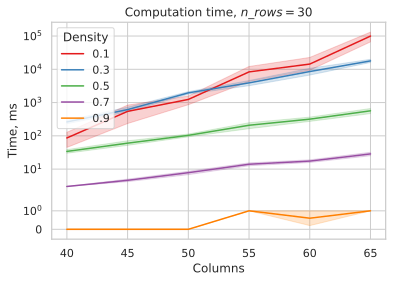

In [5]:
sns.lineplot(data=df, x='Columns', y='Time (ms)', hue='Density', palette='Set1')
plt.ylabel('Time, ms')
plt.yscale('symlog')
plt.title('Computation time, $n\_rows=30$')

Text(0.5, 1.0, 'Computation time, $density=0.3, n\\_columns=50$')

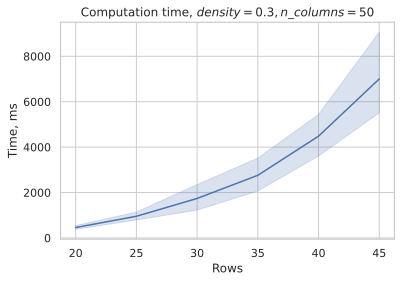

In [7]:
sns.lineplot(data=df, x='Rows', y='Time (ms)', palette='Set1')
plt.ylabel('Time, ms')
plt.title('Computation time, $density=0.3, n\_columns=50$')

Text(0.5, 1.0, 'Computation time, $density=0.3$')

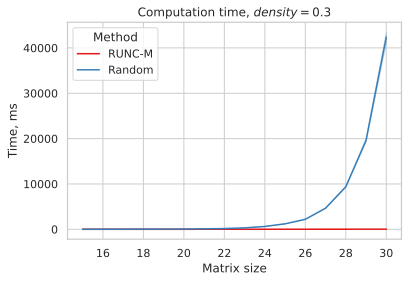

In [17]:
sns.lineplot(data=df.reset_index(), x='Rows', y='Time (ms)', palette='Set1', hue='Method')
plt.ylabel('Time, ms')
plt.xlabel('Matrix size')
plt.title('Computation time, $density=0.3$')

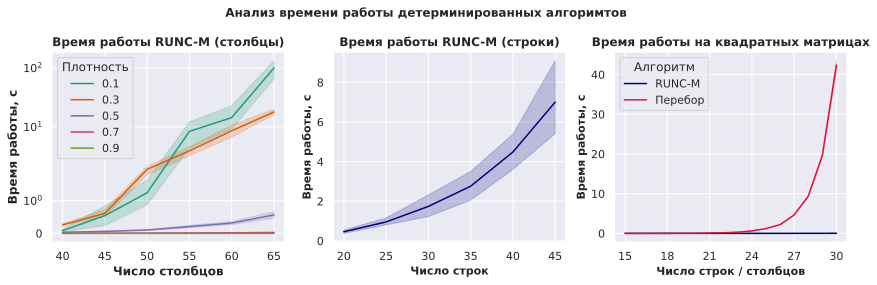

In [70]:
# fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

df0 = pd.read_csv('runc_square.csv')
df1 = pd.read_csv('random_square.csv')

df = pd.concat((df0, df1))
df['Алгоритм'] = ['RUNC-M'] * len(df0) + ['Перебор'] * len(df1)
df['Time (s)'] = df['Time (ms)'] / 1000

sns.lineplot(data=df.reset_index(), x='Rows', y='Time (s)', palette=['Navy', 'Crimson'],
             hue='Алгоритм', ax=axes[2]).set_title('Время работы на квадратных матрицах', weight='bold')
axes[2].set_ylabel('Время работы, с', weight='bold', fontsize=11)
axes[2].set_xlabel('Число строк / столбцов', weight='bold', fontsize=11)
axes[2].set_xticks(np.linspace(15, 30, 6, dtype=int))

df = pd.read_csv('runc_rows.csv')
df['Time (s)'] = df['Time (ms)'] / 1000
sns.lineplot(data=df, x='Rows', y='Time (s)', color='Navy', ax=axes[1]).set_title('Время работы RUNC-M (строки)', weight='bold')
# sns.scatterplot(data=df.groupby('Rows').mean().reset_index(), x='Rows', y='Time (s)', color='Navy', ax=axes[1])
axes[1].set_ylabel('Время работы, с', weight='bold', fontsize=11)
axes[1].set_xlabel('Число строк', weight='bold', fontsize=11)

df = pd.read_csv('runc.csv')
df['Time (s)'] = df['Time (ms)'] / 1000
df['Плотность'] = df['Density']
sns.lineplot(data=df, x='Columns', y='Time (s)', hue='Плотность', palette='Dark2', ax=axes[0]).set_title('Время работы RUNC-M (столбцы)', weight='bold')
axes[0].set_ylabel('Время работы, с', weight='bold')
axes[0].set_xlabel('Число столбцов', weight='bold')
axes[0].set_yscale('symlog')

plt.suptitle('Анализ времени работы детерминированных алгоримтов', weight='bold')
plt.tight_layout()

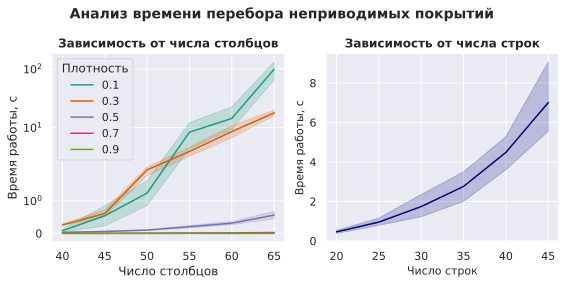

In [8]:
# fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

df0 = pd.read_csv('../logs/runc_square.csv')
df1 = pd.read_csv('../logs/random_square.csv')


df = pd.read_csv('../logs/runc_rows.csv')
df['Time (s)'] = df['Time (ms)'] / 1000
sns.lineplot(data=df, x='Rows', y='Time (s)', color='Navy', ax=axes[1]).set_title('Зависимость от числа строк', weight='bold')
# sns.scatterplot(data=df.groupby('Rows').mean().reset_index(), x='Rows', y='Time (s)', color='Navy', ax=axes[1])
axes[1].set_ylabel('Время работы, с', fontsize=11)
axes[1].set_xlabel('Число строк', fontsize=11)

df = pd.read_csv('../logs/runc.csv')
df['Time (s)'] = df['Time (ms)'] / 1000
df['Плотность'] = df['Density']
sns.lineplot(data=df, x='Columns', y='Time (s)', hue='Плотность', palette='Dark2', ax=axes[0]).set_title('Зависимость от числа столбцов', weight='bold')
axes[0].set_ylabel('Время работы, с')
axes[0].set_xlabel('Число столбцов')
axes[0].set_yscale('symlog')

plt.suptitle('Анализ времени перебора неприводимых покрытий', weight='bold', fontsize=14)
plt.tight_layout()

In [9]:
fig.savefig('../fig/RUNCM.pdf', bbox_inches='tight')